# Objetivo 
El objetivo principal de este análisis es explorar el interés de la juventud dominicana hacia la industria tecnológica y obtener una visión general de cuántos jóvenes han decidido formarse en carreras que les permitan desarrollar habilidades rentables y alineadas con las demandas del futuro. Para ello, se ha seleccionado uno de los Institutos dominicanos con mejor reputación a nivel nacional e internacional en este campo. El Instituto Tecnológico de las Américas (ITLA).

Este análisis busca responder las siguientes preguntas:
- ¿Las inscripciones han crecido o disminuido en los últimos seis años? ¿Quiénes se interesan más por esto, los chicos o las chicas? 
- ¿Qué porcentaje representan los chicos y las chicas sobre el total de inscripciones en los últimos cinco años?  
- ¿Cuáles han sido las cinco carreras más demandas en los últimos 6 años?


In [1]:
import pandas as pd
import plotly.express as px
import os

### Renderizador
Este bloque de permite mostrar graficos iterativos en GitHub sin conflicto

In [2]:
import plotly.io as pio
pio.renderers.default = 'png'

### Pregunta 1: ¿Las inscripciones han crecido o disminuido en los últimos cinco años? ¿Quiénes se interesan más por esto, los chicos o las chicas? 

Ubicando el directorio de trabajo


In [3]:
os.chdir("C:\\Users\\david\\OneDrive\\Escritorio\\PROYECTOS")

### Fuentes de los datos
Los datos utilizados para este análisis son oficiales y han sido proporcionados por el Gobierno de la República Dominicana a través del portal de datos abiertos.
- https://datos.gob.do/dataset/http-datos-gob-do-dataset-edit-estadisticas-de-estudiantes-inscritos


In [4]:
df = pd.read_csv("DataSets_Proyectos/Estadisticas_Inscritos_Educacion_Superior_2006-2025.csv")
df

,Carrera,Estudiantes femeninos,Estudiantes masculinos,Cuatrimestre,Año
0,Tecnólogo en Desarrollo de Software,3,6,Septiembre- Diciembre,2006
1,Tecnólogo en Multimedia,8,9,Septiembre- Diciembre,2006
2,Tecnólogo en Redes de Información,13,19,Septiembre- Diciembre,2006
3,Tecnólogo en Manufactura Automatizada,8,5,Septiembre- Diciembre,2006
4,Tecnólogo en Desarrollo de Software,8,13,Enero - Abril,2007
...,...,...,...,...,...
470,Tecnólogo en Multimedia,500,476,Septiembre- Diciembre,2025
471,Tecnólogo en Redes de la Información,32,202,Septiembre- Diciembre,2025
472,Tecnólogo en Seguridad Informática,194,1173,Septiembre- Diciembre,2025
473,Tecnólogo en Sonido,11,94,Septiembre- Diciembre,2025


### Renombrar columna
En este bloque cambié el nombre de la columna "Estudiantes fememinos" a "Estudiante femeninas". Para mantener la legiblidad de nuestro idioma.

In [5]:
df.rename(columns={"Estudiantes femeninos": "Estudiantes femeninas"}, inplace=True)
df

,Carrera,Estudiantes femeninas,Estudiantes masculinos,Cuatrimestre,Año
0,Tecnólogo en Desarrollo de Software,3,6,Septiembre- Diciembre,2006
1,Tecnólogo en Multimedia,8,9,Septiembre- Diciembre,2006
2,Tecnólogo en Redes de Información,13,19,Septiembre- Diciembre,2006
3,Tecnólogo en Manufactura Automatizada,8,5,Septiembre- Diciembre,2006
4,Tecnólogo en Desarrollo de Software,8,13,Enero - Abril,2007
...,...,...,...,...,...
470,Tecnólogo en Multimedia,500,476,Septiembre- Diciembre,2025
471,Tecnólogo en Redes de la Información,32,202,Septiembre- Diciembre,2025
472,Tecnólogo en Seguridad Informática,194,1173,Septiembre- Diciembre,2025
473,Tecnólogo en Sonido,11,94,Septiembre- Diciembre,2025


### Filtrar datos
En este bloque se han filtrado los datos por la columna "Año", en un rango del año 2020 hasta el 2025. Lo almacenamos en nuevo DataSet (datos_filtrados).

In [6]:
datos_filtrado = df[df["Año"].between(2020, 2025)]
datos_filtrado

,Carrera,Estudiantes femeninas,Estudiantes masculinos,Cuatrimestre,Año
219,Tecnólogo en Mecatrónica,41,356,Enero - Abril,2020
220,Tecnólogo en Desarrollo de Software,174,1139,Enero - Abril,2020
221,Tecnólogo en Sonido,1,93,Enero - Abril,2020
222,Tecnólogo en Multimedia,209,333,Enero - Abril,2020
223,Tecnólogo en Manufactura Automatizada,10,48,Enero - Abril,2020
...,...,...,...,...,...
470,Tecnólogo en Multimedia,500,476,Septiembre- Diciembre,2025
471,Tecnólogo en Redes de la Información,32,202,Septiembre- Diciembre,2025
472,Tecnólogo en Seguridad Informática,194,1173,Septiembre- Diciembre,2025
473,Tecnólogo en Sonido,11,94,Septiembre- Diciembre,2025


### Agrupar y calcular datos
En este bloque se agrupan los datos por la columna "Año" y le aplicamos la función suma a las columnas necesarias. Tambiém reseteamos los índices para que Año siga siendo una columna.

In [7]:
datos_filtrado = datos_filtrado.groupby("Año").agg({
    "Estudiantes femeninas" : "sum",
    "Estudiantes masculinos" : "sum"
})
datos_filtrado = datos_filtrado.reset_index()
datos_filtrado

,Año,Estudiantes femeninas,Estudiantes masculinos
0,2020,1660,7754
1,2021,2246,10269
2,2022,2625,11362
3,2023,2897,11888
4,2024,3779,14237
5,2025,4502,15794


### Transformando el DataFrame
Este bloque transforma nuestro DataFrame para tener los valores de los estudiantes en general en una misma columna. Esto para mostrar dichos valores en las barras al momento de graficar. 

Almacena este nuevo DataFrame en una nueva variable "datos_transformados."

In [8]:
datos_transformados = datos_filtrado.melt(
    id_vars="Año",
    value_vars=["Estudiantes femeninas", "Estudiantes masculinos"],
    var_name="Género",
    value_name="Cantidad"
)
datos_transformados


,Año,Género,Cantidad
0,2020,Estudiantes femeninas,1660
1,2021,Estudiantes femeninas,2246
2,2022,Estudiantes femeninas,2625
3,2023,Estudiantes femeninas,2897
4,2024,Estudiantes femeninas,3779
5,2025,Estudiantes femeninas,4502
6,2020,Estudiantes masculinos,7754
7,2021,Estudiantes masculinos,10269
8,2022,Estudiantes masculinos,11362
9,2023,Estudiantes masculinos,11888


### Visualización: Gráfico de barras múltiples
En este bloque creamos el gráfico y estilizamos todo lo relacionado a este, títulos, leyenda, mensajes y hover.


El último bloque de codigo de esta celda "Hover" manipula los parámetros del hover (lo que se muestra cuando pasamos el mouse sobre las barras).  
Con este bucle obtenemos de forma dinámica lo que va a mostrar el parámetro "genero", ya sea estudiantes 
femeninas o masculinos. también muestra el valor del eje Y en formato de miles.


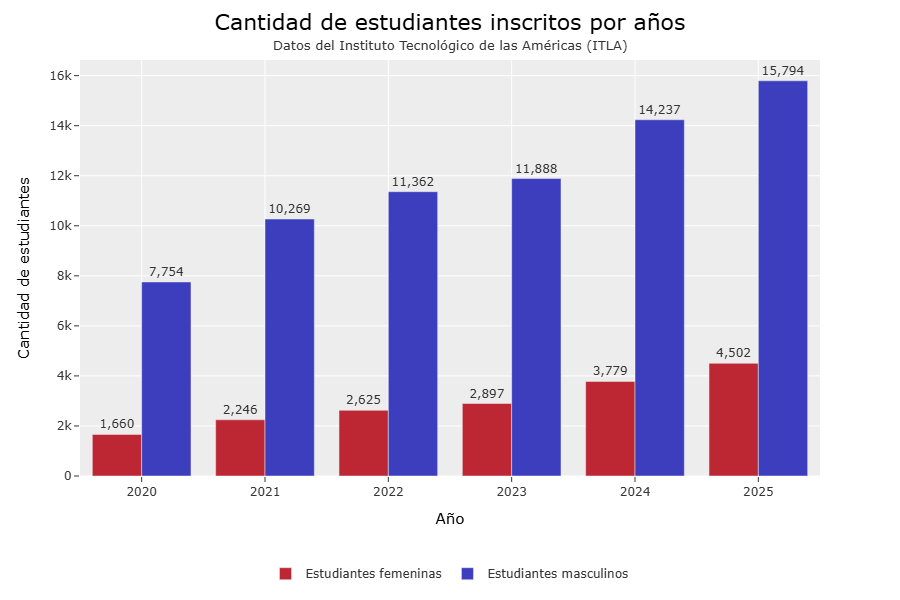

In [31]:
# Creación y estilos del gráfico
fig = px.bar(
    datos_transformados,
    template = "ggplot2",
    x = "Año",
    y = "Cantidad",
    barmode = "group",
    color = "Género",
    color_discrete_sequence = ["#bd2734", "#3c3ebe"],
    text = "Cantidad"

)
# Asignar título principal y los títulos de los ejes
fig.update_layout(
    title = {
        "text": "Cantidad de estudiantes inscritos por años",
        "font": {
            "size": 22,
            "color": "black"
            }
    },
    yaxis_title = "Cantidad de estudiantes",
    yaxis_title_font = {"size": 15, "color": "black"},
    xaxis_title_font = {"size": 15, "color": "black"},
    width = 900,
    height = 600
    

# Ubicación y características de la leyenda
)
fig.update_layout(
    legend_title = None,
    legend = {
        "orientation":  "h", 
        "y":  -0.2, 
        "x": 0.5, 
        "xanchor":  "center",  
        "yanchor": "top"
        },
        legend_title_font = {"size": 15, "color": "black"}
    )
# Agregar y ubicar un mensaje en nuestro gráfico
fig.add_annotation(
    text = "Datos del Instituto Tecnológico de las Américas (ITLA)",
    xref = "paper",
    yref = "paper",
    x = 0.5,
    y = 1.06,
    showarrow = False,
    font = {"size" : 13}
    
)
# Hover
for i, trace in enumerate(fig.data):
    nombre_genero = trace.name

    fig.data[i].hovertemplate = f"Género: {nombre_genero}<br>" + \
                                "Cantidad: %{y:,.0f}<br>" + \
                                "Año: %{x}<br>" + \
                                 "<extra></extra>"

# Configuración de como se muestran los valores en las barras
fig.update_traces(
    texttemplate="%{text:,.0f}", 
    textposition="outside"       
)                  
fig.show()

## Hallazgos
### Este gráfico muestra que en estos seis años la cantidad de estudiantes inscritos ha sido creciente en sentido general. Siendo el género masculino el que predomina en cada año.

### Pregunta 2: ¿Qué porcentaje representan los chicos y las chicas sobre el total de inscripciones en los últimos cinco años?  

### Creando una nueva columna
En este bloque creamos otra columna "Grupo". Le asignamos un único valor a todas sus filas con una función lambda, esto para agrupar por esta columna mas adelante.

In [10]:
datos_filtrado["Grupo"] = datos_filtrado.apply(lambda x: 1, axis = 1)
datos_filtrado

,Año,Estudiantes femeninas,Estudiantes masculinos,Grupo
0,2020,1660,7754,1
1,2021,2246,10269,1
2,2022,2625,11362,1
3,2023,2897,11888,1
4,2024,3779,14237,1
5,2025,4502,15794,1


### Agrupar datos y calcular columnas
En este bloque agrupamos por la columna que creamos anteriormente "Grupo", y le aplicamos la función suma a las columnas necesarias. Almacenamos este DataFrame en una nueva variable (datos_filtrados2).

In [11]:
datos_filtrado2 = datos_filtrado.groupby("Grupo").agg({
    "Estudiantes femeninas": "sum",
    "Estudiantes masculinos": "sum"
})
datos_filtrado2 = datos_filtrado2.reset_index()
datos_filtrado2

,Grupo,Estudiantes femeninas,Estudiantes masculinos
0,1,17709,71304


### Columna nueva: calcular total
En este bloque se ha creado una nueva columna "Total inscritos". Esta muestra el total de estudiantes inscritos sin separar por género, la creamos con el fin de mostrar su valor como un mensaje en el grafico.

In [12]:
datos_filtrado2["Total inscritos"] = datos_filtrado2["Estudiantes femeninas"] +  datos_filtrado2["Estudiantes masculinos"]
datos_filtrado2

,Grupo,Estudiantes femeninas,Estudiantes masculinos,Total inscritos
0,1,17709,71304,89013


### Transformar el DataFrame
Este bloque convierte nuestro DataFrame original a un formato legible para crear un gráfico de pastel (Pie Chart). 
Pasa de tener una sola fila y tres columnas a un formato con dos columnas y dos filas.

En la variable "data" se almacena la estructura base del DataFrame: cada clave representa una columna y cada valor es una lista con sus datos. 
Luego, esta estructura se convierte en un DataFrame real mediante la variable "df_original".

La variable "generos" define las categorías que representarán los segmentos del gráfico, mientras que "cantidades" almacena los valores numéricos correspondientes. 
Finalmente, estos datos se combinan en "df_pie", el DataFrame final que usaremos para graficar.


In [13]:
data = {
    'Grupo': [1],
    'Estudiantes femeninas': [17709],
    'Estudiantes masculinos': [71304]
}
df_original = pd.DataFrame(data)

generos = ['Estudiantes femeninas', 'Estudiantes masculinos']
cantidades = [df_original['Estudiantes femeninas'].iloc[0], df_original['Estudiantes masculinos'].iloc[0]]

df_pie = pd.DataFrame({'Género': generos, 'Cantidad': cantidades})


### Visualización: Gráfico de pastel (Pie Chart)
En este bloque creamos nuestro Pie Chart y estilizamos todo lo relacionado a este, títulos, leyenda y mensajes.

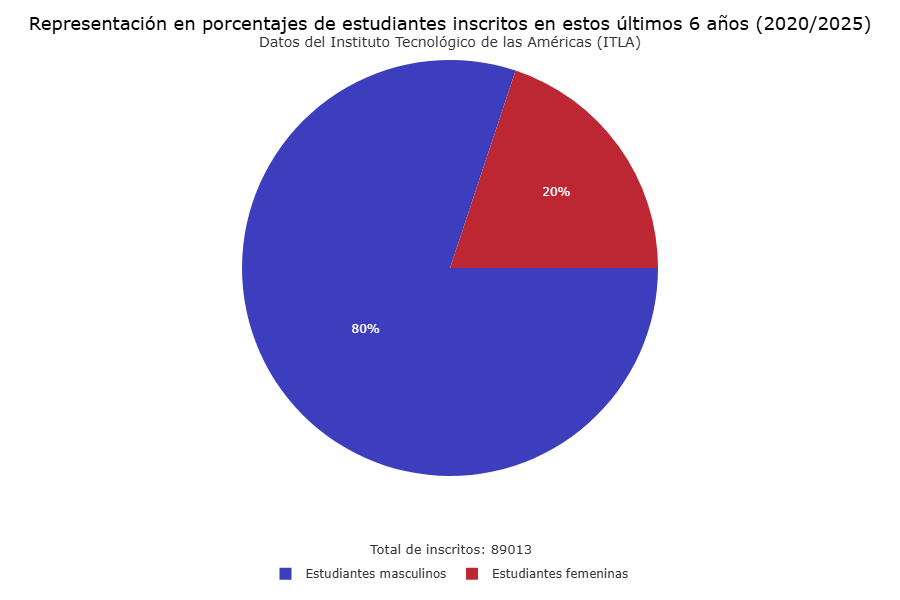

In [30]:
 # Creación del gráfico
fig = px.pie(
    df_pie,
    template = "ggplot2",
    values = cantidades,
    names = generos,
    color_discrete_sequence = ["#3c3ebe", "#bd2734"],
    
)
# Título principal y size
fig.update_layout(
    title = {
        "text": "Representación en porcentajes de estudiantes inscritos en estos últimos 6 años (2020/2025)",
        "font": {
            "size": 18,
            "color": "black"
            }
    },
    width = 900,
    height = 600
)

# Ubicación de la leyenda
fig.update_layout(
    legend_title = None,
    legend = {
        "orientation":  "h", 
        "y":  -0.2, 
        "x": 0.5, 
        "xanchor":  "center",  
        "yanchor": "top"
        },
        legend_title_font = {"size": 15, "color": "black"}
    )
# Añadiendo un mensaje al gráfico
fig.add_annotation(
    text = "Datos del Instituto Tecnológico de las Américas (ITLA)",
    x = 0.5,
    y = 1.07,
    showarrow = False,
    font = {"size" : 14}
    
)
# Añadiendo un segundo mensaje al gráfico
fig.add_annotation(
    text = f"Total de inscritos: {datos_filtrado2['Total inscritos'].values[0]}",
    x = 0.5,
    y = -0.2 ,
    showarrow = False,
    font = {"size" : 13}

)
# Asignando el grado en que se ve el gráfico y quitandos los decimales a los valores de este
fig.update_traces(
    rotation = 90,
    texttemplate = "%{percent:.0%}",
    )
fig.show()

## Hallazgos
### Este gráfico muestra que de las 89,013 inscripciones en los últimos 6 años,  el 80% ha sido del género masculino, mientras que las feminas representan el 20%.

### Pregunta 3: ¿Cuáles han sido las cinco carreras más demandas en los últimos 5 años?

Partimos de nuestro DataFrame original almacenado en "df" y volvemos a filtrar los años necesarios. Esto DataFrame lo almacenamos en una nueva variable "datos_3".

In [15]:
datos_3 = df[df["Año"].between(2020, 2025)]
datos_3

,Carrera,Estudiantes femeninas,Estudiantes masculinos,Cuatrimestre,Año
219,Tecnólogo en Mecatrónica,41,356,Enero - Abril,2020
220,Tecnólogo en Desarrollo de Software,174,1139,Enero - Abril,2020
221,Tecnólogo en Sonido,1,93,Enero - Abril,2020
222,Tecnólogo en Multimedia,209,333,Enero - Abril,2020
223,Tecnólogo en Manufactura Automatizada,10,48,Enero - Abril,2020
...,...,...,...,...,...
470,Tecnólogo en Multimedia,500,476,Septiembre- Diciembre,2025
471,Tecnólogo en Redes de la Información,32,202,Septiembre- Diciembre,2025
472,Tecnólogo en Seguridad Informática,194,1173,Septiembre- Diciembre,2025
473,Tecnólogo en Sonido,11,94,Septiembre- Diciembre,2025


### Agrupar y calcular datos
En este bloque agrupamos los datos por la columna carrera y aplicamos una función de suma a las columnas necesarias.
### Importante
Esta agrupación muestra que la carrera "Multimedia" se repite, también deja al descubierto un error semántico en la carrera "Tecnólogo en Redes de Información": esta también aparece como "Tecnólogo en Redes de la Información". Mediante una investigación en la página oficial del ITLA, confirmamos que esta última carrera es una misma. Este hallazgo en los datos no afecta los análisis anteriores.

En el siguiente bloque de código se detecta porqué se repite Multimedia y se unen estas carreras como una sola.

In [16]:
datos_3 = datos_3.groupby("Carrera").agg({
    "Estudiantes femeninas": "sum",
    "Estudiantes masculinos": "sum"
})
datos_3

,Estudiantes femeninas,Estudiantes masculinos
Carrera,,
Tecnólogo en Analítica y Ciencia de los Datos,763,1751
Tecnólogo en Ciberseguridad,22,152
Tecnólogo en Desarrollo de Simulaciones Interactivas y Videojuegos,240,1506
Tecnólogo en Desarrollo de Software,4519,29398
Tecnólogo en Diseño Industrial,661,833
Tecnólogo en Dispositivos Médicos,83,125
Tecnólogo en Energías Renovables,95,549
Tecnólogo en Informática Forense,415,1043
Tecnólogo en Inteligencia Artificial,334,1051


### Verificar datos únicos
Este bloque resetea los índices para tratar a "Carrera" como una columna. Usa la función "unique()" para retornar los valores únicos de dicha columna. Muestra que en una de las carreras "Multimedia" hay un espacio demás en las comillas 'Tecnólogo en Multimedia ', esto hace que Pandas la interprete como una carrera diferente.

In [17]:
# resetear indices
datos_3 = datos_3.reset_index()
# mostrar valores unicos
datos_3["Carrera"].unique()

array(['Tecnólogo en Analítica y Ciencia de los Datos',
       'Tecnólogo en Ciberseguridad',
       'Tecnólogo en Desarrollo de Simulaciones Interactivas y Videojuegos',
       'Tecnólogo en Desarrollo de Software',
       'Tecnólogo en Diseño Industrial',
       'Tecnólogo en Dispositivos Médicos',
       'Tecnólogo en Energías Renovables',
       'Tecnólogo en Informática Forense',
       'Tecnólogo en Inteligencia Artificial',
       'Tecnólogo en Manufactura Automatizada',
       'Tecnólogo en Manufactura de Dispositivos Médicos ',
       'Tecnólogo en Mecatrónica', 'Tecnólogo en Multimedia',
       'Tecnólogo en Multimedia ', 'Tecnólogo en Redes de Información',
       'Tecnólogo en Redes de la Información',
       'Tecnólogo en Seguridad Informática', 'Tecnólogo en Sonido',
       'Tecnólogo en Telecomunicaciones'], dtype=object)

### Limpieza de datos: volver a agrupar
Este bloque limpia los datos para resolver los problemas anteriores.

Una vez hecho esto, volvemos a agrupar. Esta vez sin errores.

In [18]:
# Elimina espacios al inicio y al final
datos_3["Carrera"] = datos_3["Carrera"].str.strip()

# Reemplaza el nombre del registro
datos_3["Carrera"] = datos_3["Carrera"].replace({
    "Tecnólogo en Redes de la Información": "Tecnólogo en Redes de Información"
})



In [19]:
datos_3 = datos_3.groupby("Carrera").agg({
    "Estudiantes femeninas": "sum",
    "Estudiantes masculinos": "sum"
})
datos_3

,Estudiantes femeninas,Estudiantes masculinos
Carrera,,
Tecnólogo en Analítica y Ciencia de los Datos,763,1751
Tecnólogo en Ciberseguridad,22,152
Tecnólogo en Desarrollo de Simulaciones Interactivas y Videojuegos,240,1506
Tecnólogo en Desarrollo de Software,4519,29398
Tecnólogo en Diseño Industrial,661,833
Tecnólogo en Dispositivos Médicos,83,125
Tecnólogo en Energías Renovables,95,549
Tecnólogo en Informática Forense,415,1043
Tecnólogo en Inteligencia Artificial,334,1051


### Nueva columna
Este bloque crea una nueva columna "Total inscritos". Esta es el resultado de la suma de las columnas Estudiantes femeninas	y Estudiantes masculinos.

In [20]:
datos_3["Total inscritos"] = datos_3["Estudiantes femeninas"] + datos_3["Estudiantes masculinos"]
datos_3

,Estudiantes femeninas,Estudiantes masculinos,Total inscritos
Carrera,,,
Tecnólogo en Analítica y Ciencia de los Datos,763,1751,2514
Tecnólogo en Ciberseguridad,22,152,174
Tecnólogo en Desarrollo de Simulaciones Interactivas y Videojuegos,240,1506,1746
Tecnólogo en Desarrollo de Software,4519,29398,33917
Tecnólogo en Diseño Industrial,661,833,1494
Tecnólogo en Dispositivos Médicos,83,125,208
Tecnólogo en Energías Renovables,95,549,644
Tecnólogo en Informática Forense,415,1043,1458
Tecnólogo en Inteligencia Artificial,334,1051,1385


### Orden descendente
Este bloque ordenas los datos de forma descendente, esto para quedarnos con los primeros cinco en el siguiente bloque.

In [21]:
datos_3 = datos_3.sort_values(
    by = "Total inscritos",
    ascending = False
)
datos_3

,Estudiantes femeninas,Estudiantes masculinos,Total inscritos
Carrera,,,
Tecnólogo en Desarrollo de Software,4519,29398,33917
Tecnólogo en Multimedia,6406,7744,14150
Tecnólogo en Seguridad Informática,1747,10865,12612
Tecnólogo en Mecatrónica,695,6107,6802
Tecnólogo en Sonido,759,4661,5420
Tecnólogo en Redes de Información,575,3878,4453
Tecnólogo en Analítica y Ciencia de los Datos,763,1751,2514
Tecnólogo en Desarrollo de Simulaciones Interactivas y Videojuegos,240,1506,1746
Tecnólogo en Diseño Industrial,661,833,1494


### Top 5
Este bloque se queda solo con las primeras cinco carreras de nuestro DataFrame "datos_3". Esto lo almacenamos en nueva variable "df_top5".

In [22]:
df_top5 = datos_3.head(5)
df_top5 = df_top5.reset_index()
df_top5.to_csv("top_carreras.csv")

### Visualización: Gráfico de barras
En este bloque creamos el gráfico y estilizamos todo lo relacionado a este, títulos, leyenda y mensajes.

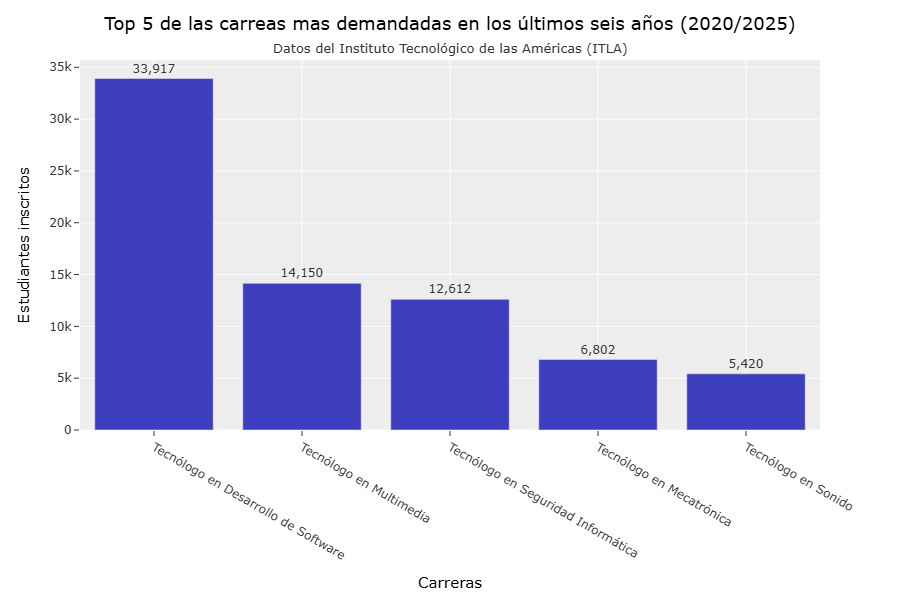

In [27]:
# Creación del gráfico
fig = px.bar(
    df_top5,
    template = "ggplot2",
    x = "Carrera",
    y = "Total inscritos",
    color_discrete_sequence = ["#3c3ebe"],
    text = "Total inscritos"
    
)
# Título principal
fig.update_layout(
    title = {
        "text": "Top 5 de las carreas mas demandadas en los últimos seis años (2020/2025)",
        "font": {
            "size": 18,
            "color": "black"
            }
    },
    yaxis_title = "Estudiantes inscritos",
    yaxis_title_font = {"size": 15, "color": "black"},
    xaxis_title = "Carreras",
    xaxis_title_font = {"size": 15, "color": "black"},
    width = 900,
    height = 600
       
)
# Agregar y ubicar un mensaje en nuestro gráfico
fig.add_annotation(
    text = "Datos del Instituto Tecnológico de las Américas (ITLA)",
    xref = "paper",
    yref = "paper",
    x = 0.5,
    y = 1.06,
    showarrow = False,
    font = {"size" : 13}
    
)
# Configuración de como se muestran los valores en las barras
fig.update_traces(
    texttemplate="%{text:,.0f}", 
    textposition="outside"       
)
fig.show()

  ## Hallazgos
  Este gráfico muestra que el Tecnólogo en Desarrollo de Software ha sido el líder indiscutible cundo de demandas hablamos, este supera por mucho las demás carreras.

# Conclusión General
El análisis evidencia un incremento muy significativo en las inscripciones, con ambos géneros mostrando un aumento superior al 100%.
##### Carrera líder: 
El Tecnólogo en Desarrollo de Software se consolida como la más demandada durante el período analizado.
##### Brecha de género: 
Los estudiantes masculinos representan alrededor del 80% de las inscripciones. Reducir esta brecha no solo es un asunto de equidad, sino también una oportunidad para ampliar la reserva de talento disponible en el área tecnológica.